In [ ]:
import ROOT

In [ ]:
file_ = ROOT.TFile( "CalibPPS-ESProducers/xangle_beta_distributions/version1.root", "READ" )

In [ ]:
# file_.cd( "2017_preTS2" )
# file_.cd( "2018_preTS1" )
file_.ls()

In [ ]:
# h2_betaStar_vs_xangle_ = file_.Get( "2017_preTS2/h2_betaStar_vs_xangle" )
# h2_betaStar_vs_xangle_ = file_.Get( "2018_preTS1/h2_betaStar_vs_xangle" )
h2_betaStar_vs_xangle_ = file_.Get( "2018_TS1_TS2/h2_betaStar_vs_xangle" )
# h2_betaStar_vs_xangle_ = file_.Get( "2018_postTS2/h2_betaStar_vs_xangle" )

In [ ]:
canvas_ = ROOT.TCanvas()
h2_betaStar_vs_xangle_.ProjectionX().Draw()
canvas_.Draw()

In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2018A/SingleMuon-Run2018A_merged.root"
fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2018B/SingleMuon-Run2018B_merged.root"
# fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2018C/SingleMuon-Run2018C_merged.root"
# fileName_ = "/eos/user/a/antoniov/Workspace/analysis/data/PPS/SingleMuon-Run2018D/SingleMuon-Run2018D_merged.root"

root_ = uproot.open( fileName_ )

# tree_path_ = "demo/SlimmedNtuple"
tree_path_ = "SlimmedNtuple"

print ( "Number of events in tree: {}".format( np.array( root_[ tree_path_ + "/event"] ).size ) )

print ( root_[ tree_path_ ].keys() )

Number of events in tree: 219645
['muon_pt', 'muon_eta', 'muon_phi', 'muon_px', 'muon_py', 'muon_pz', 'muon_e', 'muon_charge', 'muon_iso', 'muon_dxy', 'muon_dz', 'electron_pt', 'electron_eta', 'electron_phi', 'electron_dxy', 'electron_dz', 'electron_px', 'electron_py', 'electron_pz', 'electron_e', 'electron_charge', 'met', 'met_x', 'met_y', 'met_phi', 'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4', 'recoMWhad', 'recoMWlep', 'recoMWW', 'recoRapidityWW', 'recoWWpt', 'genWWpt', 'dphiWW', 'WLeptonicPt', 'WLeptonicPhi', 'WLeptonicEta', 'jet_pt', 'jet_px', 'jet_py', 'jet_pz', 'jet_energy', 'jet_phi', 'jet_eta', 'jet_mass', 'jet_tau1', 'jet_tau2', 'jet_corrmass', 'jet_vertexz', 'jet_jer_res', 'jet_jer_sf', 'jet_jer_sfup', 'jet_jer_sfdown', 'hlt', 'gen_W_pt', 'gen_W_charge', 'gen_jet_pt', 'gen_jet_phi', 'gen_jet_eta', 'gen_jet_energy', 'nVertices', 'pileupWeight', 'mc_pu_trueinteractions', 'mcWeight', 'run', 'event', 'lumiblock', 'crossingAngle',

In [7]:
arr_run = np.array( root_[ tree_path_ + "/run"] )
arr_lumiblock = np.array( root_[ tree_path_ + "/lumiblock"] )
arr_event = np.array( root_[ tree_path_ + "/event"] )
arr_crossingAngle = np.array( root_[ tree_path_ + "/crossingAngle"] )
print ( arr_run )
print ( arr_lumiblock )
print ( arr_event )
print ( arr_crossingAngle )

[317696 317696 317696 ... 317527 317527 317527]
[  55   55   55 ... 1455 1455 1455]
[  46143813   45850192   46053749 ... 2079215913 2079223739 2079634299]
[160. 160. 160. ... 136. 136. 136.]


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 33010.,
         7444.,  9181., 10539., 11236., 11955., 12967., 13544., 14999.,
        18167., 15234., 14279., 18787., 10106.,  2974., 15223.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([100., 102., 104., 106., 108., 110., 112., 114., 116., 118., 120.,
        122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
        144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164.,
        166., 168., 170., 172., 174., 176., 178., 180., 182., 184., 186.,
        188., 190., 192., 194., 196., 198., 200.], dtype=float32),
 <BarContainer object of 50 artists>)

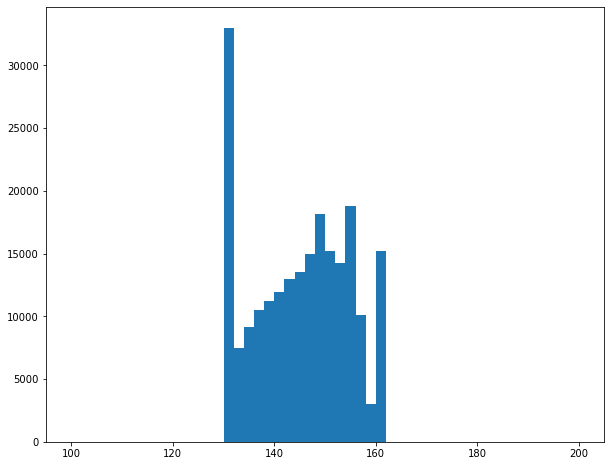

In [8]:
fig = plt.figure( figsize=(10,8) )
plt.hist( arr_crossingAngle, bins=50, range=(100,200) )